In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              read_csv_file_v2,
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time,
                              calculate_MSD,
                              generate_track
                             )

In [2]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

In [3]:
# path_save = "D:/OneDrive - University of Warwick/06-KineticAnalysisMounia/4-Figures"
path_save = "/home/u2175049/Documents/Code/KineticAnalysis/notebook/figures/"

In [5]:
first_time = True
for prot in ["snail", "very_long_prot"]:
    prot_length = prot_aa_size["32xsuntag"]+prot_aa_size[prot]
    for i in range(100):
        x_global, y_global, y_start_prot = generate_track(prot_length = prot_length, 
                                                          suntag_appearance=24, 
                                                          fluo_max_ref=32, 
                                                          fluo_max=128, 
                                                          translation_rate=24, 
                                                          binding_rate=0.05,
                                                          step = 0.1)
        if first_time:
            datas = pd.DataFrame({"FRAME":x_global,
                                  "MEAN_INTENSITY_CH1":y_global,
                                  "TRACK_ID" : i,
                                  "PROT":prot,
                                 })
            first_time = False
        else:
            datas = pd.concat([datas, 
                               pd.DataFrame({"FRAME":x_global,
                                              "MEAN_INTENSITY_CH1":y_global,
                                              "TRACK_ID" : i,
                                             "PROT":prot,
                                 })], ignore_index=True)


datas.to_csv("datas_test_prot_size.csv")

In [4]:
datas = pd.read_csv("datas_test_prot_size.csv")

In [9]:
first_time = True
for prot in ["snail", "very_long_prot"]:
    prot_length = prot_aa_size["32xsuntag"]+prot_aa_size[prot]
    for i in range(100):
        (x, 
        y, 
        x_auto, 
        y_auto, 
        elongation_r, 
        translation_init_r,
        perr) = single_track_analysis(datas[datas["PROT"]==prot], 
                                     i, 
                                     delta_t = 0.1,
                                     protein_size=prot_length,
                                     normalise_intensity=1,
                                     normalize_auto=True,
                                     mm=None,
                                     lowpass_=False,
                                     cutoff=100,
                                     rtol=1e-1,
                                     method="original",
                                     force_analysis=True,
                                     first_dot=True)
        if first_time:
            results = pd.DataFrame({"elongation_r":elongation_r, 
                                    "init_translation_r":translation_init_r, 
                                    "dt":0.1,
                                   "id":i,
                                   "prot":prot},
                                  index=[0])
            first_time = False
        
        else:
            results = pd.concat([results, 
                            pd.DataFrame({"elongation_r":elongation_r, 
                                          "init_translation_r":translation_init_r, 
                                          "dt":0.1, 
                                          "id":i,
                                         "prot":prot}, index=[0])
                            ], ignore_index=True)

to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
original method
to fix
orig

In [10]:
results.groupby(by='prot')[['elongation_r','init_translation_r']].mean()

,elongation_r,init_translation_r
prot,,
snail,30.429375,0.051309
very_long_prot,28.008688,0.055668


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


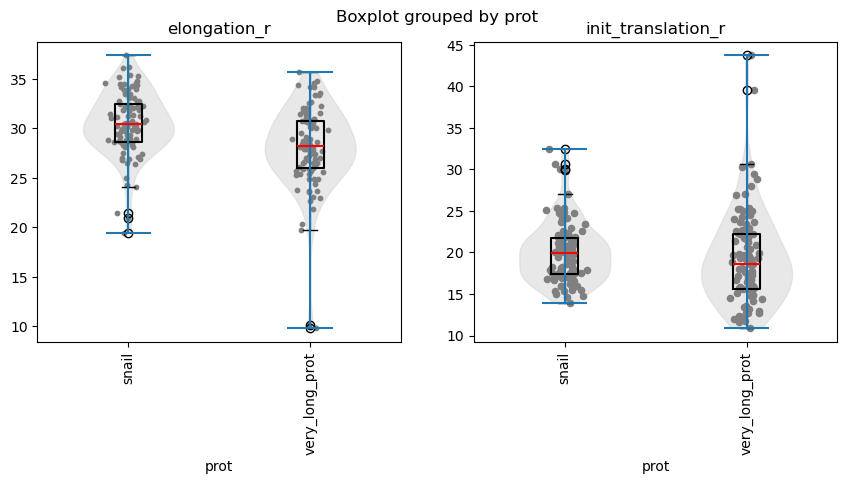

In [11]:
fig, ax = plt.subplots(1,2)
results['init_translation_r'] = 1/results['init_translation_r']
results.boxplot(['elongation_r'] , 
               by='prot', 
               grid=False, 
               ax = ax[0],
               rot=90, 
                boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
              )

violin = ax[0].violinplot(dataset = [results[results.prot == "snail"]["elongation_r"].values,
                                     results[results.prot == "very_long_prot"]["elongation_r"].values,
                          ])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

results.boxplot(['init_translation_r'] , 
               by='prot', 
               grid=False, 
               ax = ax[1],
               rot=90,
               boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
               )

violin = ax[1].violinplot(dataset = [results[results.prot == "snail"]["init_translation_r"].values,
                                     results[results.prot == "very_long_prot"]["init_translation_r"].values,])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

group = 'prot'
column = 'elongation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
group = 'prot'
column = 'init_translation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
# ax[1].set_ylim(0,250)
fig.set_size_inches((10,4))
fig.savefig(os.path.join(path_save, "results_prot_size_boxplot_original.eps"), dpi=300)

In [17]:
results

,elongation_r,init_translation_r,dt,id
0,22.085661,0.030738,0.1,0
1,29.949495,0.056837,0.1,1
2,5.427918,0.025032,0.1,2
3,14.552147,0.032119,0.1,3
4,20.554593,0.034079,0.1,4
...,...,...,...,...
595,9.883333,0.014489,60.0,95
596,9.883333,0.015652,60.0,96
597,9.883333,0.020909,60.0,97
598,9.883333,0.019611,60.0,98


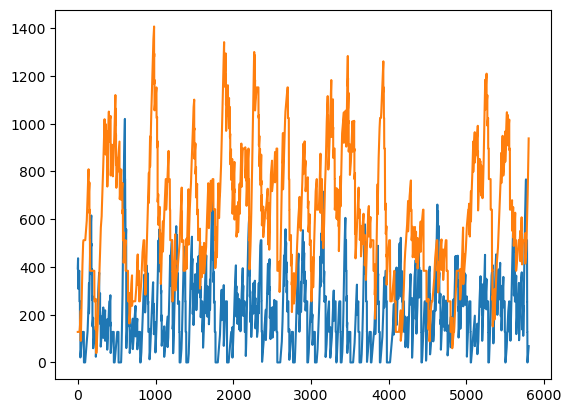

In [38]:
fig, ax = plt.subplots()
for prot in ["snail", "very_long_prot"]:
    for i in range(1):
        ax.plot(datas[(datas["PROT"]==prot) & (datas["TRACK_ID"]==i)]["FRAME"],
               datas[(datas["PROT"]==prot) & (datas["TRACK_ID"]==i)]["MEAN_INTENSITY_CH1"])
        

In [11]:
groupby_datas = pd.DataFrame(datas.groupby(["TRACK_ID", "PROT"]).mean()["MEAN_INTENSITY_CH1"])
groupby_datas["prot"] = groupby_datas.index.get_level_values("PROT")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


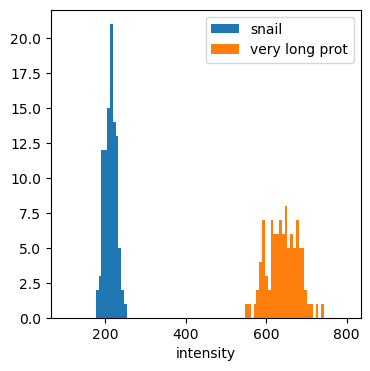

In [12]:
fig, ax = plt.subplots()
_=ax.hist(groupby_datas[groupby_datas.index.get_level_values("PROT").isin(["snail"])]["MEAN_INTENSITY_CH1"].to_numpy(), 
          bins=100, 
          range=[100,800],
         label="snail")
_=ax.hist(groupby_datas[groupby_datas.index.get_level_values("PROT").isin(["very_long_prot"])]["MEAN_INTENSITY_CH1"].to_numpy(),
          bins=100, 
          range=[100,800],
         label="very long prot")
ax.legend()
ax.set_xlabel("intensity")

fig.set_size_inches((4,4))
fig.savefig(os.path.join(path_save, "results_prot_size_hist.eps"), dpi=300)